# Assignment 03 
## Problem 01 


Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

dataset = pd.read_csv('Human_activity_Dataset.csv')     # shape = (10299, 563)

dataset = dataset.drop(columns=['subject/Participant'])

### Preprocessing

dataset = pd.get_dummies(dataset, columns=['Activity'])
dataset_train, dataset_valid_test = train_test_split(dataset, test_size=0.4)
dataset_valid, dataset_test = train_test_split(dataset_valid_test, test_size=0.5)

labels_train = dataset_train[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_valid = dataset_valid[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_test = dataset_test[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                            'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

features_train = dataset_train.drop(columns=labels_train)
features_valid = dataset_valid.drop(columns=labels_valid)
features_test = dataset_test.drop(columns=labels_test)

input_neuron_num = (features_train).shape[1]           # 561:   excluded columns: 'Activity' and 'subject/Participant'    
output_neuron_num = 6                                  # 6:     There are six neurons in the output layer.

## Model Generation

#### 1. Model 01:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0379 - train_accuracy: 0.9876
 ###
 val_loss: 0.0551 - val_accuracy: 0.9806
 ###
 test_loss:0.0561 - test_accuracy: 0.9796

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 561)               0         
                                                                 
 dense (Dense)               (None, 128)               71936     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 90,614
Trainable params: 90,614
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] -

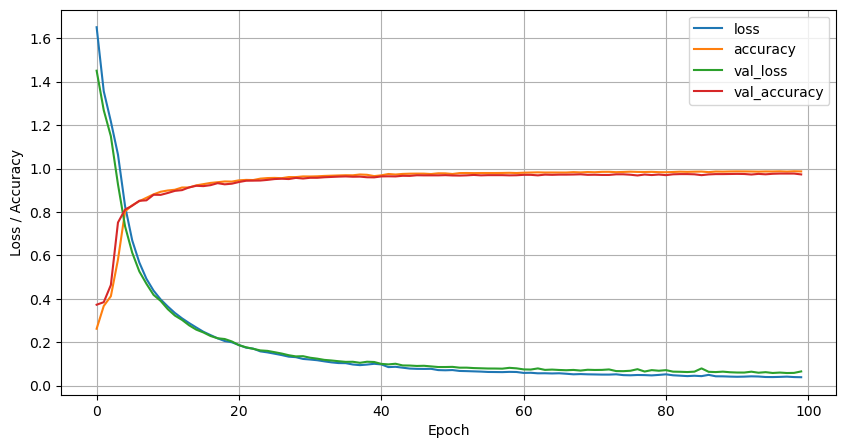

65/65 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9723


[0.07446806132793427, 0.9723300933837891]

In [2]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_1.summary()

optimizer_1 = optimizers.Adam(learning_rate=0.0001)

model_1.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_1,
              metrics=["accuracy"]
             )

result_hist_1 = model_1.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_1.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_1.evaluate(features_test, labels_test)

#### 2. Model 02:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0321 - train_accuracy: 0.9896
 ###
 val_loss: 0.0459 - val_accuracy: 0.9820
 ###
 test_loss:0.0510 - test_accuracy: 0.9786

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_2,
              metrics=["accuracy"]
             )

result_hist_2 = model_2.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_3.summary()

optimizer_3 = optimizers.Adam(learning_rate=0.0067)             # best result: lr=0.007

model_3.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_3,
              metrics=["accuracy"]
             )

result_hist_3 = model_3.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_3.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_3.evaluate(features_test, labels_test)

In [ ]:
model_3.summary()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(output_neuron_num, activation="softmax")
])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer_2,
    metrics=["accuracy"]
)

result_hist_2 = model_2.fit(
    features_train,
    labels_train,
    batch_size=256,
    epochs=100,
    validation_data=(features_valid, labels_valid)
)

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(output_neuron_num, activation="softmax")
])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer_2,
    metrics=["accuracy"]
)

result_hist_2 = model_2.fit(
    features_train,
    labels_train,
    batch_size=256,
    epochs=100,
    validation_data=(features_valid, labels_valid)
)

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)


## Recurrent Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(None, 561)))  # LSTM layer with 128 units
model.add(Dense(6, activation='softmax'))  # Output layer with 6 units (for categorical labels)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare your data (X: input features, y: categorical labels)
# Make sure your data is in the shape (samples, timesteps, features)
# X.shape should be (num_samples, num_timesteps, num_features)
# y.shape should be (num_samples, num_classes)

# Train the model
model.fit(, y, epochs=10, batch_size=32)  # Adjust the number of epochs and batch size as needed

# Once the model is trained, you can use it for predictions
predictions = model.predict(X_test)  # X_test should have the same shape as X

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)  # X_test and y_test are the test set data

# Save the trained model
model.save('rnn_model.h5')


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

dataset = pd.read_csv('Human_activity_Dataset.csv')     # shape = (10299, 563)

dataset = dataset.drop(columns=['subject/Participant'])

### Preprocessing

dataset = pd.get_dummies(dataset, columns=['Activity'])
dataset_train, dataset_valid_test = train_test_split(dataset, test_size=0.4)
dataset_valid, dataset_test = train_test_split(dataset_valid_test, test_size=0.5)

labels_train = dataset_train[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_valid = dataset_valid[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_test = dataset_test[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                            'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

features_train = dataset_train.drop(columns=labels_train)
features_valid = dataset_valid.drop(columns=labels_valid)
features_test = dataset_test.drop(columns=labels_test)

input_neuron_num = (features_train).shape[1]           # 561:   excluded columns: 'Activity' and 'subject/Participant'    
output_neuron_num = 6                                  # 6:     There are six neurons in the output layer.

Epoch 1/50
194/194 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8548 - val_loss: 0.2389 - val_accuracy: 0.9131
Epoch 2/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9332 - val_loss: 0.1386 - val_accuracy: 0.9461
Epoch 3/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9574 - val_loss: 0.1562 - val_accuracy: 0.9374
Epoch 4/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9600 - val_loss: 0.1649 - val_accuracy: 0.9320
Epoch 5/50
194/194 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9709 - val_loss: 0.1155 - val_accuracy: 0.9553
Epoch 6/50
194/194 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9717 - val_loss: 0.1139 - val_accuracy: 0.9529
Epoch 7/50
194/194 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9730 - val_loss: 0.1159 - val_accuracy: 0.9519
Epoch 

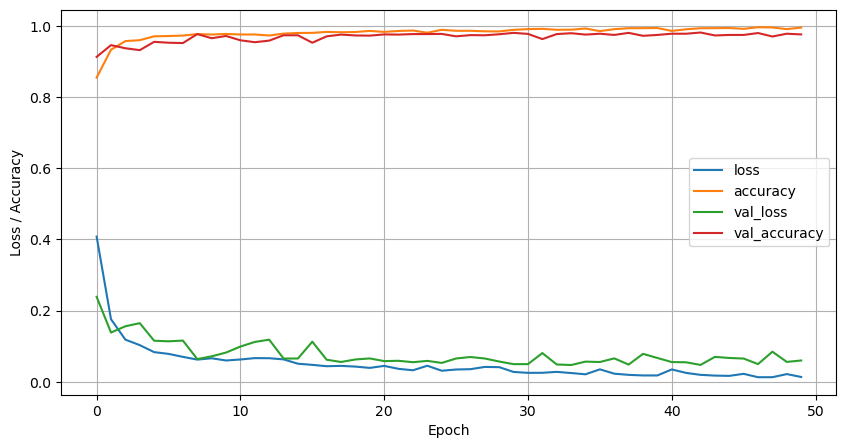

65/65 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9772
Epoch 1/50
194/194 [==============================] - 3s 9ms/step - loss: 0.4590 - accuracy: 0.8257 - val_loss: 0.2141 - val_accuracy: 0.9277
Epoch 2/50
194/194 [==============================] - 1s 7ms/step - loss: 0.1657 - accuracy: 0.9367 - val_loss: 0.1476 - val_accuracy: 0.9461
Epoch 3/50
194/194 [==============================] - 1s 6ms/step - loss: 0.1248 - accuracy: 0.9505 - val_loss: 0.1026 - val_accuracy: 0.9617
Epoch 4/50
194/194 [==============================] - 1s 6ms/step - loss: 0.0986 - accuracy: 0.9618 - val_loss: 0.1000 - val_accuracy: 0.9617
Epoch 5/50
194/194 [==============================] - 1s 5ms/step - loss: 0.0821 - accuracy: 0.9688 - val_loss: 0.1230 - val_accuracy: 0.9500
Epoch 6/50
194/194 [==============================] - 1s 6ms/step - loss: 0.0689 - accuracy: 0.9759 - val_loss: 0.0803 - val_accuracy: 0.9684
Epoch 7/50
194/194 [==============================] - 1s 6ms/

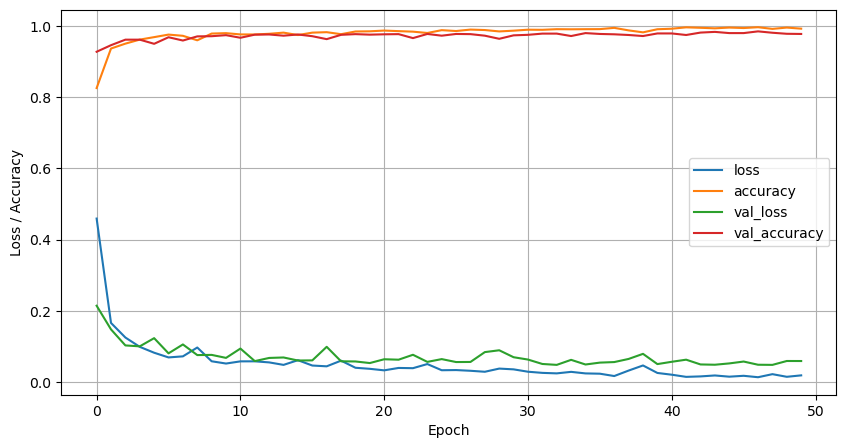

65/65 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9840
Epoch 1/50
194/194 [==============================] - 3s 9ms/step - loss: 0.4152 - accuracy: 0.8589 - val_loss: 0.2123 - val_accuracy: 0.9189
Epoch 2/50
194/194 [==============================] - 1s 8ms/step - loss: 0.1398 - accuracy: 0.9524 - val_loss: 0.1422 - val_accuracy: 0.9447
Epoch 3/50
194/194 [==============================] - 2s 8ms/step - loss: 0.1082 - accuracy: 0.9616 - val_loss: 0.1062 - val_accuracy: 0.9597
Epoch 4/50
194/194 [==============================] - 2s 9ms/step - loss: 0.0950 - accuracy: 0.9649 - val_loss: 0.0846 - val_accuracy: 0.9665
Epoch 5/50
194/194 [==============================] - 2s 8ms/step - loss: 0.0777 - accuracy: 0.9712 - val_loss: 0.0806 - val_accuracy: 0.9689
Epoch 6/50
194/194 [==============================] - 2s 8ms/step - loss: 0.0721 - accuracy: 0.9751 - val_loss: 0.0694 - val_accuracy: 0.9723
Epoch 7/50
194/194 [==============================] - 1s 7ms/

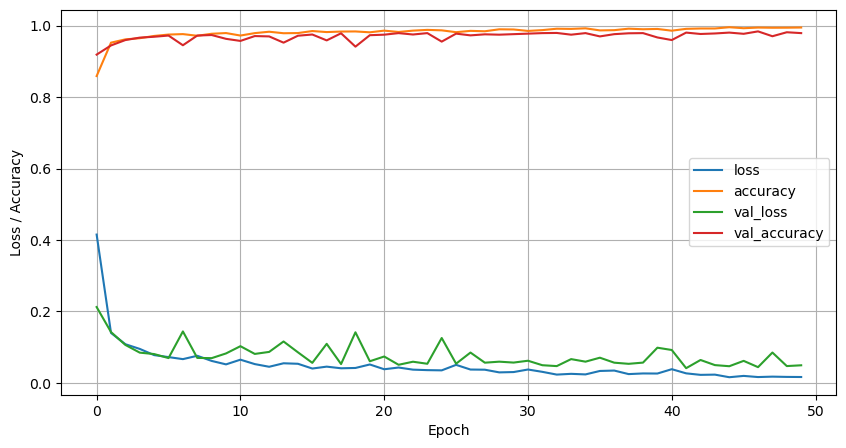

65/65 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9854


[0.041083451360464096, 0.9854369163513184]

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM

X = features_train
y = labels_train

a = np.zeros((X.shape[0], 1, X.shape[1]))
a[:,0,:] = X
X = a

a = np.zeros((features_valid.shape[0], 1, features_valid.shape[1]))
a[:,0,:] = features_valid
features_valid = a

a = np.zeros((features_test.shape[0], 1, features_test.shape[1]))
a[:,0,:] = features_test
features_test = a

# Define the SimpleRNN model
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(128, input_shape=(None, 561)))
model_simple_rnn.add(Dense(6, activation='softmax'))

# Compile the SimpleRNN model
model_simple_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the SimpleRNN model
result_hist_simple = model_simple_rnn.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))  
                                                                   # Adjust the number of epochs and batch size as needed

pd.DataFrame(result_hist_simple.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_simple_rnn.evaluate(features_test, labels_test)

# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(None, 561)))
model_gru.add(Dense(6, activation='softmax'))

# Compile the GRU model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the GRU model
result_hist_gru = model_gru.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))
                                                         # Adjust the number of epochs and batch size as needed

pd.DataFrame(result_hist_gru.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_gru.evaluate(features_test, labels_test)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(None, 561)))
model_lstm.add(Dense(6, activation='softmax'))

# Compile the LSTM model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
result_hist_lstm = model_lstm.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))
                                                                 # Adjust the number of epochs and batch size as needed

pd.DataFrame(result_hist_lstm.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_lstm.evaluate(features_test, labels_test)


Epoch 1/50
194/194 [==============================] - 1s 3ms/step - loss: 0.4340 - accuracy: 0.8385 - val_loss: 0.1978 - val_accuracy: 0.9359
Epoch 2/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9370 - val_loss: 0.1893 - val_accuracy: 0.9296
Epoch 3/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9540 - val_loss: 0.1042 - val_accuracy: 0.9621
Epoch 4/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9584 - val_loss: 0.1327 - val_accuracy: 0.9485
Epoch 5/50
194/194 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9608 - val_loss: 0.0886 - val_accuracy: 0.9612
Epoch 6/50
194/194 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9647 - val_loss: 0.0918 - val_accuracy: 0.9602
Epoch 7/50
194/194 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9723 - val_loss: 0.0983 - val_accuracy: 0.9636
Epoch 

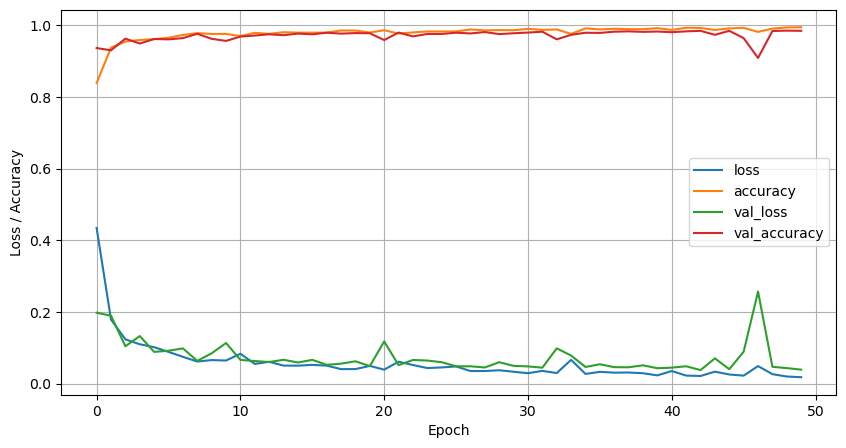

65/65 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9845
Epoch 1/50
194/194 [==============================] - 5s 11ms/step - loss: 0.3884 - accuracy: 0.8501 - val_loss: 0.1882 - val_accuracy: 0.9277
Epoch 2/50
194/194 [==============================] - 2s 8ms/step - loss: 0.1706 - accuracy: 0.9345 - val_loss: 0.1616 - val_accuracy: 0.9359
Epoch 3/50
194/194 [==============================] - 1s 7ms/step - loss: 0.1123 - accuracy: 0.9571 - val_loss: 0.0966 - val_accuracy: 0.9612
Epoch 4/50
194/194 [==============================] - 2s 8ms/step - loss: 0.1235 - accuracy: 0.9523 - val_loss: 0.1375 - val_accuracy: 0.9437
Epoch 5/50
194/194 [==============================] - 2s 8ms/step - loss: 0.0962 - accuracy: 0.9618 - val_loss: 0.0839 - val_accuracy: 0.9621
Epoch 6/50
194/194 [==============================] - 2s 10ms/step - loss: 0.0817 - accuracy: 0.9662 - val_loss: 0.0892 - val_accuracy: 0.9631
Epoch 7/50
194/194 [==============================] - 2s 9m

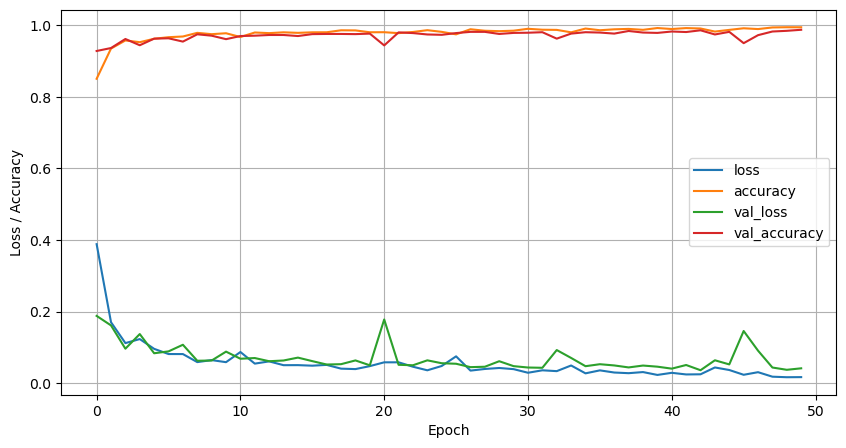

65/65 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9820
Epoch 1/50
194/194 [==============================] - 7s 16ms/step - loss: 0.3769 - accuracy: 0.8590 - val_loss: 0.2332 - val_accuracy: 0.9068
Epoch 2/50
194/194 [==============================] - 2s 12ms/step - loss: 0.1738 - accuracy: 0.9338 - val_loss: 0.1687 - val_accuracy: 0.9335
Epoch 3/50
194/194 [==============================] - 2s 13ms/step - loss: 0.1138 - accuracy: 0.9574 - val_loss: 0.0941 - val_accuracy: 0.9636
Epoch 4/50
194/194 [==============================] - 2s 12ms/step - loss: 0.1163 - accuracy: 0.9561 - val_loss: 0.1456 - val_accuracy: 0.9437
Epoch 5/50
194/194 [==============================] - 2s 13ms/step - loss: 0.0931 - accuracy: 0.9641 - val_loss: 0.0847 - val_accuracy: 0.9631
Epoch 6/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0806 - accuracy: 0.9667 - val_loss: 0.0749 - val_accuracy: 0.9675
Epoch 7/50
194/194 [==============================] - 2

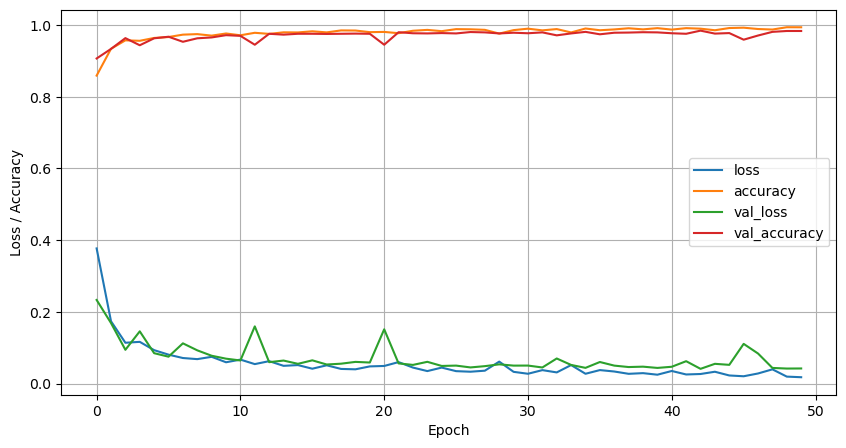

65/65 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9816


[0.047963421791791916, 0.9815533757209778]

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Bidirectional

X = features_train
y = labels_train

a = np.zeros((X.shape[0], 1, X.shape[1]))
a[:, 0, :] = X
X = a

a = np.zeros((features_valid.shape[0], 1, features_valid.shape[1]))
a[:, 0, :] = features_valid
features_valid = a

a = np.zeros((features_test.shape[0], 1, features_test.shape[1]))
a[:, 0, :] = features_test
features_test = a

# Define the SimpleRNN model
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(128, input_shape=(None, 561)))
model_simple_rnn.add(Dense(6, activation='softmax'))

# Compile the SimpleRNN model
model_simple_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the SimpleRNN model
result_hist_simple = model_simple_rnn.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_simple.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_simple_rnn.evaluate(features_test, labels_test)

# Define the GRU model
model_gru = Sequential()
model_gru.add(Bidirectional(GRU(128), input_shape=(None, 561)))
model_gru.add(Dense(6, activation='softmax'))

# Compile the GRU model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the GRU model
result_hist_gru = model_gru.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_gru.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_gru.evaluate(features_test, labels_test)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128), input_shape=(None, 561)))
model_lstm.add(Dense(6, activation='softmax'))

# Compile the LSTM model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
result_hist_lstm = model_lstm.fit(X, y, epochs=50, batch_size=32, validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_lstm.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_lstm.evaluate(features_test, labels_test)
